# Clasificación de Agua en Imágenes Usando K-Means

Este notebook utiliza el algoritmo K-Means para clasificar los píxeles de una imagen en grupos, identificando zonas que representan agua.


In [1]:
import numpy as np
import cv2 as cv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta = r'C:\Users\Daniel Calderon\Desktop\2024-2 Poli\Vision Con IA\Practica3_(Parcial)\Parte_1\imagen_filtrada.tiff'



# Carga de Imagen Escala de Grises


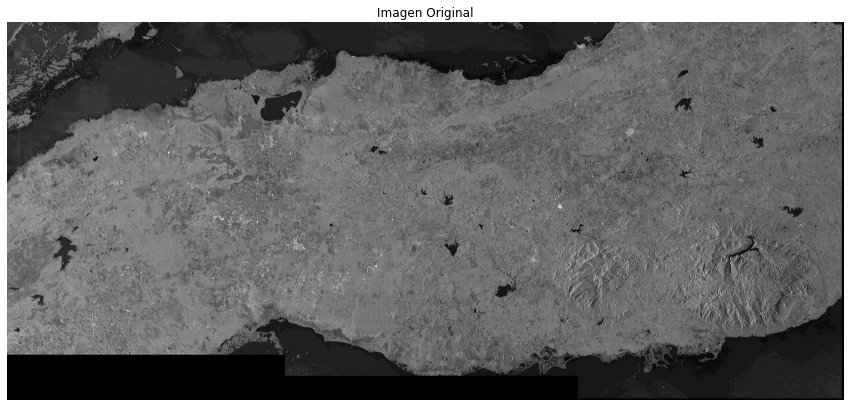

In [2]:
imagen = cv.imread(ruta, 0)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.show()

## Reducir el tamaño de la imagen para disminuir el costo computacional si se requiere la imagen original ingresar el valor de factor_reduccion en 1


In [3]:
factor_reduccion = 0.20
imagen_reducida = cv.resize(imagen, (0, 0), fx=factor_reduccion, fy=factor_reduccion)


# Aplanar la imagen para adespués ingresarla en el modelo k-means

In [4]:
imagen_reshaped = imagen_reducida.reshape(-1, 1)

# Aplicar K-Means

In [5]:
# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=5)
kmeans.fit(imagen_reshaped)

# Obtener las etiquetas de los clusters
etiquetas = kmeans.labels_

# Mantener solo la clase "agua" (etiqueta 1) y eliminar otras clases
agua_imagen = np.zeros_like(imagen_reshaped)  # Crear un array del mismo tamaño que imagen_reshaped

# Asignar negro a los píxeles clasificados como agua (etiqueta 1) y blanco a los demás
agua_imagen[etiquetas == 1] = 0  # Asignar negro a los píxeles clasificados como agua
agua_imagen[etiquetas != 1] = 255  # Asignar blanco a los demás píxeles

# Reshape de agua_imagen para que coincida con las dimensiones de imagen_reducida
agua_imagen = agua_imagen.reshape(imagen_reducida.shape)  # Reshape para que coincida con la imagen reducida


# Mostrar la imagen segmentada con solo la clase "agua"

(2273, 5040)


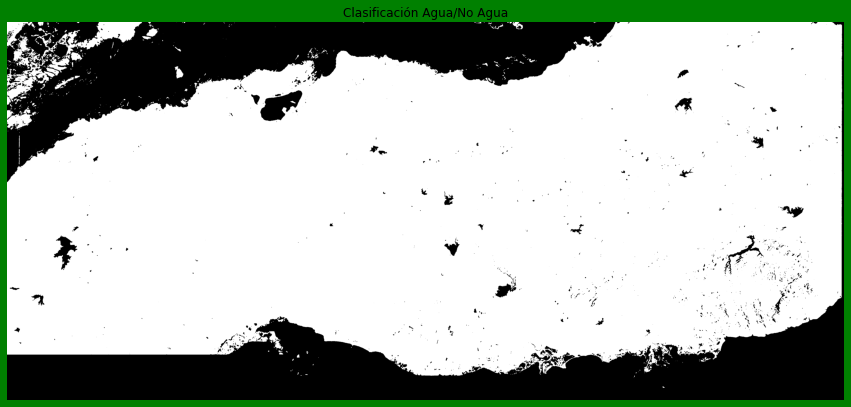

In [6]:
plt.figure(figsize=(15, 8), facecolor='green')
plt.axis('off')  # Ocultar los ejes
plt.imshow(agua_imagen, cmap='gray')
plt.title('Clasificación Agua/No Agua')
print(agua_imagen.shape)
plt.show()


# Redimensionar la imagen segmentada al tamaño original

In [7]:
agua_reescalada = cv.resize(agua_imagen, (imagen.shape[1], imagen.shape[0]))

# Mostrar la imagen reescalada

(11363, 25202)


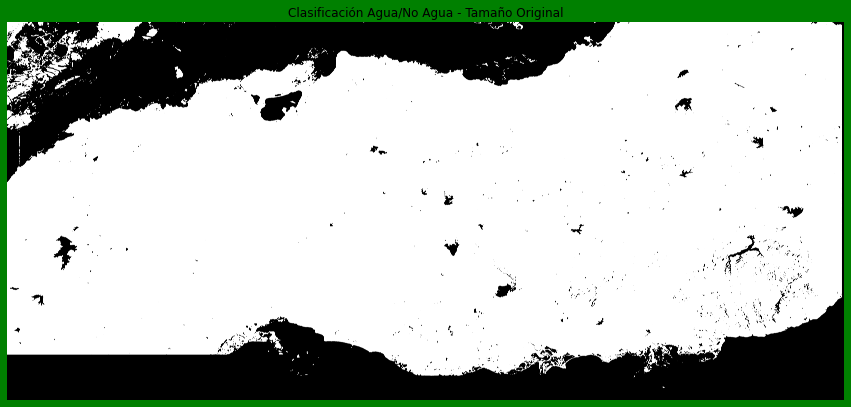

In [8]:
plt.figure(figsize=(15, 15), facecolor='green')
plt.imshow(agua_reescalada, cmap='gray')
plt.axis('off')
plt.title('Clasificación Agua/No Agua - Tamaño Original')
print(agua_reescalada.shape)
plt.show()

# Resumen del Código: Clasificación de Agua/No Agua

Este código realiza la clasificación de una imagen en función de la presencia de agua utilizando el algoritmo K-Means para segmentar la imagen.

## Pasos Realizados:

1. **Importación de Bibliotecas**:
   - Se importan las bibliotecas necesarias: 
     - `numpy` para manipulación de arreglos,
     - `cv2` (OpenCV) para procesamiento de imágenes,
     - `KMeans` de `sklearn` para la segmentación,
     - `matplotlib.pyplot` para la visualización,
     

2. **Carga de la Imagen**:
   - Se carga una imagen en escala de grises desde una ruta específica.

3. **Visualización de la Imagen Original**:
   - La imagen original se muestra en una ventana de visualización.

4. **Reducción del Tamaño de la Imagen**:
   - La imagen se reduce a un 20% de su tamaño original para optimizar el procesamiento.

5. **Aplanado de la Imagen**:
   - La imagen reducida se aplana para convertirla en una estructura adecuada para el K-Means.

6. **Aplicación de KMeans**:
   - Se aplica el algoritmo KMeans con 3 clusters para segmentar la imagen.

7. **Clasificación y Filtrado de Agua**:
   - Se crean dos arreglos: 
     - `agua_imagen`, que contiene solo la clase "agua" (etiqueta 1), asignando negro a los píxeles clasificados como agua y blanco a los demás.
     - El arreglo se reconfigura para que coincida con las dimensiones de la imagen reducida.

8. **Visualización de la Clasificación**:
   - Se muestra la imagen segmentada donde solo se visualiza la clase "agua".

9. **Redimensionamiento de la Imagen Segmentada**:
   - La imagen segmentada se redimensiona al tamaño original.

10. **Visualización de la Imagen Reescalada**:
    - Se muestra la imagen de clasificación de agua/no agua en su tamaño original.

## Conclusiones:
- Este procedimiento permite identificar y visualizar áreas de agua en imágenes satelitales o de drones, siendo útil en aplicaciones de monitoreo ambiental y gestión de recursos hídricos.


# 😊
